In [28]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data_dir = "data/hchains"
all_files = os.listdir(data_dir)
output_files = [f for f in all_files if "out" in f]
print(output_files)

['hchain_out_4.hdf5', 'hchain_out_2.hdf5', 'hchain_out_6.hdf5']


In [30]:
evol_times = {}
eps2_vals = {}
nsteps_vals = {}
sorting_times = {}
v2_times = {}
expectation_times = {}

for f in output_files:
    h5_f = h5py.File(data_dir + "/" + f, "r")
    l = h5_f["l"][()]
    evol_time = h5_f["evol_time"][()]
    eps2 = h5_f["eps2_exact"][()]
    n_steps = h5_f["num_steps"][()]
    sorting_time = h5_f["sorting_time"][()]
    v2_time = h5_f["v2_time"][()]
    expectation_time = h5_f["expectation_time"][()]
    h5_f.close()
    evol_times[l] = evol_time
    eps2_vals[l] = eps2
    nsteps_vals[l] = n_steps
    sorting_times[l] = sorting_time
    v2_times[l] = v2_time
    expectation_times[l] = expectation_time

In [31]:
records = []
for l in sorted(evol_times.keys()):
    records.append((l, evol_times[l], eps2_vals[l], nsteps_vals[l], sorting_times[l], v2_times[l], expectation_times[l]))
df = pd.DataFrame.from_records(
    records,
    columns=["l", "evol_time", "eps2", "nsteps", "sorting_time", "v2_time", "expectation_time"]
)

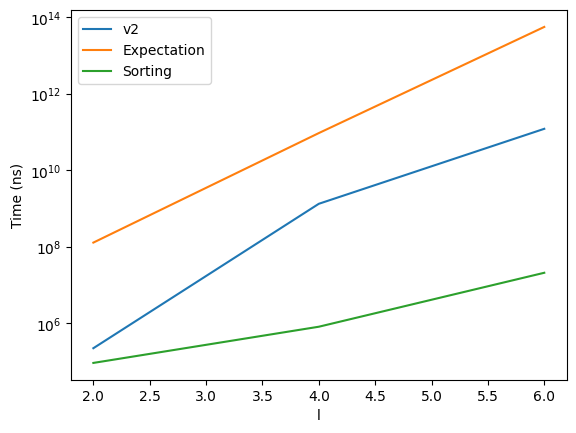

In [32]:
fig, ax = plt.subplots()
ax.plot(df["l"], df["v2_time"], label="v2")
ax.plot(df["l"], df["expectation_time"], label="Expectation")
ax.plot(df["l"], df["sorting_time"], label="Sorting")
ax.set_xlabel("l")
ax.set_ylabel("Time (ns)")
ax.set_yscale("log")
ax.legend()

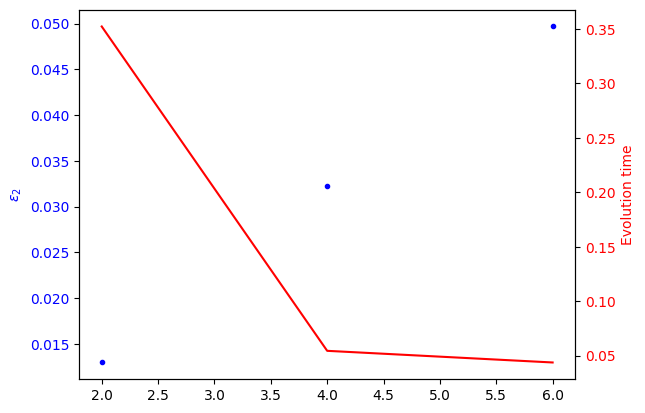

In [33]:
fig2, ax2 = plt.subplots()
color = "blue"
ax2.plot(df["l"], df["eps2"], '.', color=color, label=r"$\epsilon_2$")
# ax2.plot(df["size"], df["eps2 bound"], '.', label=r"Bound on $\epsilon_2$")
ax2.set_ylabel(r"$\epsilon_2$", color=color)
ax2.tick_params(axis="y", labelcolor=color)

color = "red"
ax2b = ax2.twinx()
ax2b.plot(df["l"], df["evol_time"], '-', color=color, label="Evolution time")
ax2b.set_ylabel("Evolution time", color=color)
ax2b.tick_params(axis="y", labelcolor=color)

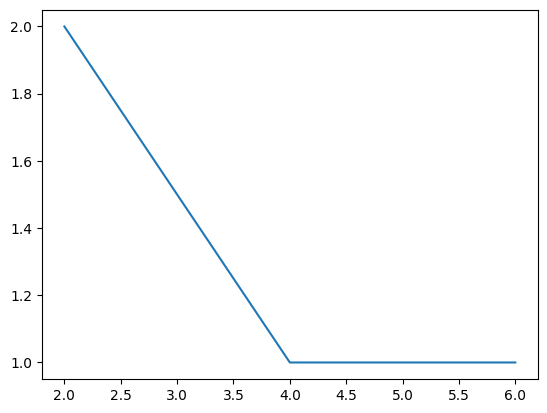

In [34]:
fig3, ax3 = plt.subplots()
ax3.plot(df["l"], df["nsteps"])